# Метод прогонки

### Для чего используется:
- Решение систем линейных уравнений с трёхдиагональной матрицей.  

##### Примеры сфер применения:
- Решение дифференциальных уравнений.
- Сглаживание и фильтрация сигналов.
- Цепи Маркова.
- Моделирование поверхностей.
- Обработка изображений.

### Главная идея:
Последовательное исключение переменных из системы уравнений.

### Алгоритм:
1. Прямая прогонка:
    Начиная с первого уравнения, выражаем неизвестную через следующую неизвестную и свободный член.  
    Повторяем этот процесс для каждого следующего уравнения, используя формулы, полученные на предыдущем шаге.  
    
2. Обратная прогонка:
Используя формулу, полученную на последнем шаге прямой прогонки, находим значение последней неизвестной.
Подставляем найденное значение в предыдущие формулы, получая значения остальных неизвестных.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

### Уравнение:

$$ y'' + p(x)y' + q(x)y = f(x) $$  
$$ y'' - (10 + \sin(2\pi * x)) * y = \cos(2\pi * x) $$

#### Коэффициенты в нашем случае:

In [21]:
def p(x):
    return 0

def q(x):
    return 10 + np.sin(2 * np.pi * x)

def f(x):
    return np.cos(2 * np.pi * x)

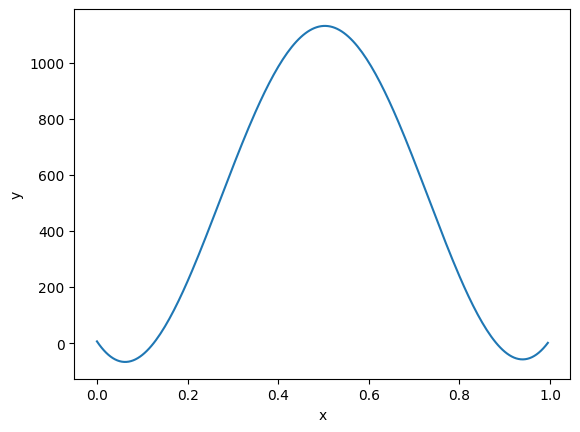

In [22]:
def RunThrough(p, q, f, h, T):
    N = int(T / h)  # Количество узлов сетки
    
    # Матрица коэффициентов
    A = np.zeros((N, N))
    A[0, 0] = 1 - h**2 * q(0)
    A[0, N-1] = 1
    A[N-1, 0] = 1
    A[N-1, N-1] = 1 - h**2 * q(T-h)
    
    for i in range(1, N-1):
        A[i, i-1] = 1 - h * p(i*h)/2
        A[i, i] = -2 - h**2 * q(i*h)
        A[i, i+1] = 1 + h * p(i*h)/2

    # Вектор правой части
    b = np.zeros(N)
    b[0] = f(0)
    b[N-1] = f(T-h)
    for i in range(1, N-1):
        b[i] = f(i*h)

    # Прямой ход
    alpha = np.zeros(N)
    beta = np.zeros(N)
    alpha[0] = -A[0, N-1] / A[0, 0]
    beta[0] = b[0] / A[0, 0]
    for i in range(1, N):
        alpha[i] = -A[i, i-1] / (A[i, i] + A[i, i-1] * alpha[i-1])
        beta[i] = (b[i] - A[i, i-1] * beta[i-1]) / (A[i, i] + A[i, i-1] * alpha[i-1])

    # Обратный ход
    y = np.zeros(N)
    y[N-1] = beta[N-1]
    for i in range(N-2, -1, -1):
        y[i] = alpha[i] * y[i+1] + beta[i]

    return y

# Пример использования
h = 0.005
T = 1
y = RunThrough(p, q, f, h, T)

# Вывод результата
plt.plot(np.arange(0, T, h), y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Плюсы:
- Высокая эффективность: один из самых быстрых алгоритмов для решения трёхдиагональных систем сложность O(N), где N - размер матрицы.
- Простота реализации.
- Низкие требования к памяти: по сравнению с другими методами.

### Минусы:
- Ограничение на структуру матрицы: применим только к трёхдиагональным матрицам.
- Чувствительность к ошибкам округления: особенно для больших матриц.